In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

# Data ( working on cifar10 dataset )

In [ ]:
# transform_train = transforms.Compose([transforms.Resize((32,32)),  #resises the image so it can be perfect for our model.
#                                       transforms.RandomHorizontalFlip(), # FLips the image w.r.t horizontal axis
#                                       transforms.RandomRotation(10),     #Rotates the image to a specified angel
#                                       transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
#                                       transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
#                                       transforms.ToTensor(), # comvert the image to tensor so that it can work with torch
#                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalize all the images
#                                ])
 
 
# transform = transforms.Compose([transforms.Resize((32,32)),
#                                transforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                                ])

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


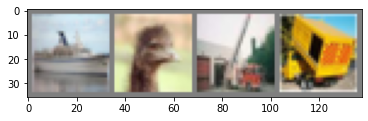

 ship  bird truck truck


In [5]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Convolutional Neural Network (a simple model)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

With this simple model (2 conv layers, 1 maxpool, and 3 fc layers) the test accuracy obtained is 54%.

# Resnet50

In [ ]:
# GPU settings

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
# net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

# The loss function and the optimizer

In [ ]:

criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet50(pretrained=True)
        self.base = nn.Sequential(*list(base.children())[:-1])
        in_features = base.fc.in_features
        self.drop = nn.Dropout()
        self.final = nn.Linear(in_features,10)
    
    def forward(self,x):
        x = self.base(x)
        x = self.drop(x.view(-1,self.final.in_features))
        return self.final(x)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        net.train()
        net.to(device)
        inputs, labels = data[0].to(device), data[1].to(device)
        # inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.647
[1,  4000] loss: 0.688
[1,  6000] loss: 0.690
[1,  8000] loss: 0.698
[1, 10000] loss: 0.738
[1, 12000] loss: 0.747
[2,  2000] loss: 0.632
[2,  4000] loss: 0.676
[2,  6000] loss: 0.693
[2,  8000] loss: 0.695
[2, 10000] loss: 0.718
[2, 12000] loss: 0.733
Finished Training


In [ ]:
# To save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network on the test data

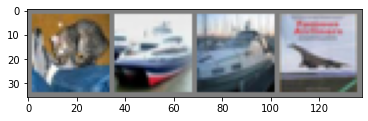

GroundTruth:    cat  ship  ship plane


In [ ]:
# Display an image from the test set to get familiar

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Load back in our saved model (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so)
net = Net()
# net = torchvision.models.resnet50(pretrained=True)
# net.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  bird  deer horse


In [ ]:
# Let us look at how the network performs on the whole dataset

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        net.eval()
        net.to(device)
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [ ]:
# what are the classes that performed well, and the classes that did not perform well

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        net.eval()
        net.to(device)
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 66.4 %
Accuracy for class car   is: 72.0 %
Accuracy for class bird  is: 63.6 %
Accuracy for class cat   is: 49.5 %
Accuracy for class deer  is: 46.2 %
Accuracy for class dog   is: 41.6 %
Accuracy for class frog  is: 72.3 %
Accuracy for class horse is: 58.4 %
Accuracy for class ship  is: 65.4 %
Accuracy for class truck is: 51.6 %


# Training on GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
net.to(device)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

# Using keras

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


So we have 50000 training images and 10000 test images.

In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. So we will convert this to 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images

In [9]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

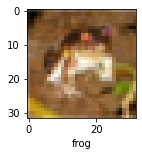

In [10]:
plot_sample(X_train, y_train, 0)

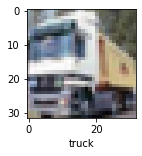

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

Build simple **artificial neural network (ANN)** for image classification

In [13]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32, 32, 3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the network for 5 epochs
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 2ms/step - loss: 1.8122 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6223 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5378 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4819 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4288 - accuracy: 0.4965


At the end of the fifth epoch, the accuracy is 49.65%

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification report: \n', classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1000
           1       0.58      0.65      0.61      1000
           2       0.41      0.35      0.38      1000
           3       0.37      0.27      0.32      1000
           4       0.49      0.33      0.39      1000
           5       0.40      0.38      0.39      1000
           6       0.50      0.59      0.54      1000
           7       0.48      0.63      0.55      1000
           8       0.56      0.67      0.61      1000
           9       0.56      0.52      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000



let us build a **convolutional neural network (CNN)** to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 32s 3ms/step - loss: 1.4315 - accuracy: 0.4897
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1044 - accuracy: 0.6116
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9796 - accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8987 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8323 - accuracy: 0.7108
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7693 - accuracy: 0.7305
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7207 - accuracy: 0.7517
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6765 - accuracy: 0.7659
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6312 - accuracy: 0.7794
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.59

With CNN, at the end 5 epochs, accuracy was at around 71.08% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9259 - accuracy: 0.6983


[0.9258572459220886, 0.6983000040054321]

In [18]:
y_pred = cnn.predict(X_test)

In [19]:
y_pred[:5]

array([[2.0042919e-02, 2.9669456e-02, 1.8259794e-01, 6.7230773e-01,
        1.1123867e-03, 9.7903768e-03, 4.5441497e-02, 2.3768696e-03,
        1.7124385e-02, 1.9536395e-02],
       [2.2037853e-04, 4.3661366e-03, 7.5477487e-07, 1.8128043e-07,
        1.3233762e-09, 6.6304467e-10, 1.7707725e-08, 2.5221176e-09,
        9.9539798e-01, 1.4621854e-05],
       [1.8517524e-01, 2.8075984e-02, 4.6228501e-04, 2.0518797e-02,
        1.3701657e-04, 2.1346984e-04, 1.3229653e-03, 1.4867677e-03,
        7.5686079e-01, 5.7466961e-03],
       [1.8689269e-01, 4.9975780e-03, 9.4255875e-04, 8.1976429e-02,
        9.9819095e-04, 3.2946162e-05, 1.5095143e-02, 2.1035220e-04,
        7.0660096e-01, 2.2531862e-03],
       [8.2542911e-06, 2.7785070e-06, 1.2384177e-03, 8.4875030e-03,
        4.8709127e-01, 1.9416057e-03, 5.0122356e-01, 1.7101918e-07,
        6.1742476e-06, 2.9266877e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

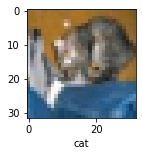

In [21]:
plot_sample(X_test, y_test, 0)

In [22]:
classes[y_classes[0]]

'cat'

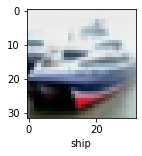

In [23]:
plot_sample(X_test, y_test, 1)

In [24]:
classes[y_classes[1]]

'ship'

# Handwritten digits classification using MNIST dataset

In [3]:
(X_train, y_train), (X_test, Y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [4]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [28]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

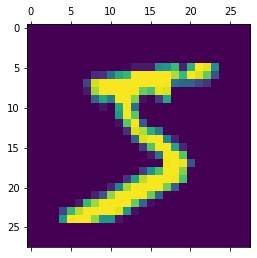

In [29]:
plt.matshow(X_train[0])

In [31]:
y_train[0]

5

In [32]:
X_train = X_train/255.0
X_test = X_test/255.0

In [33]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

using very simple neural network with no hidden layers

In [2]:
from tensorflow import keras

In [74]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4669 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9261


In [75]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - accuracy: 0.9266


[0.26674067974090576, 0.9265999794006348]

In [76]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.3674793e-02, 3.0296351e-07, 5.0287969e-02, 9.4515264e-01,
       2.0269598e-03, 8.7073140e-02, 1.1589749e-06, 9.9979442e-01,
       8.1142217e-02, 5.7547390e-01], dtype=float32)

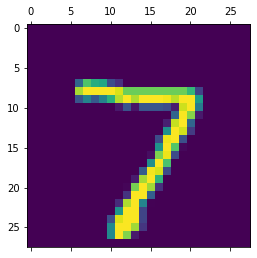

In [77]:
plt.matshow(X_test[0])

In [78]:
np.argmax(y_pred[0])

7

In [79]:
y_pred_labels = [np.argmax(element) for element in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [80]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    2,    0,    6,   11,    3,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  921,   16,    8,    2,   13,   10,   48,    3],
       [   1,    0,   20,  921,    0,   24,    2,   13,   24,    5],
       [   1,    1,    5,    1,  917,    0,   10,    4,   10,   33],
       [   7,    2,    2,   35,    8,  766,   16,    7,   42,    7],
       [   7,    3,    7,    1,    7,   10,  917,    2,    4,    0],
       [   1,    6,   23,    6,    6,    0,    0,  959,    3,   24],
       [   4,    6,    6,   14,    9,   15,    9,   12,  892,    7],
       [   8,    7,    2,    9,   25,    6,    0,   30,   12,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

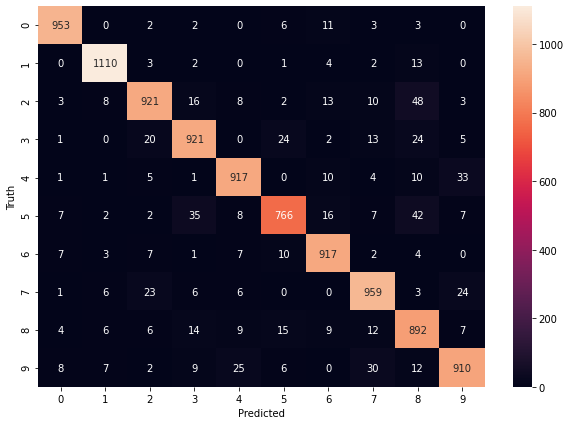

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2762 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1256 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9839


In [56]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9728


[0.0902358740568161, 0.9728000164031982]

Text(69.0, 0.5, 'Truth')

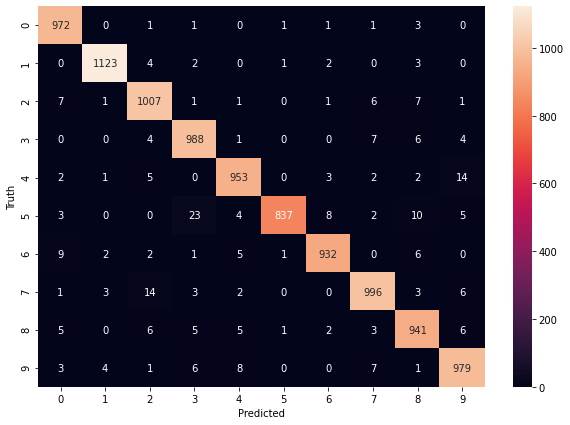

In [59]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(element) for element in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

We can use flatten layer so that we don't have to call .reshape on input dataset

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0322 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [61]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9793


[0.08061368018388748, 0.9793000221252441]

In [62]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(element) for element in y_predicted]

In [63]:
y_predicted_labels[0]

7

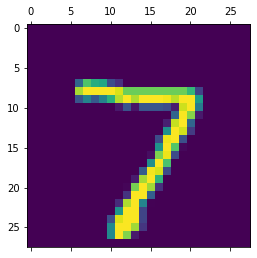

In [64]:
plt.matshow(X_test[0])

In [66]:
Y_test[0]

7

In [67]:
y_predicted_labels[10]

0

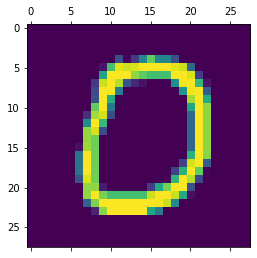

In [70]:
plt.matshow(X_test[10])

In [71]:
Y_test[10]

0

using CNN

In [22]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [23]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [24]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 2ms/step - loss: 0.4859 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0564 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9877


In [29]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9769


[0.09475938975811005, 0.9768999814987183]

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred_labels = [np.argmax(el) for el in y_pred]

In [32]:
y_pred_labels[0]

7

In [34]:
Y_test[0]

7